# Leftward Swimmers?

The direction of swimming does not reverse for $\phi > 2$ in our model.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style("whitegrid")
plt.rcParams["animation.html"] = "jshtml"
from celluloid import Camera
import stokeslets as slts
import purcell as pur

In [2]:
figfile = "figs/"

Progress: 8.33 %
Progress: 16.67 %
Progress: 25.0 %
Progress: 33.33 %
Progress: 41.67 %
Progress: 50.0 %
Progress: 58.33 %
Progress: 66.67 %
Progress: 75.0 %
Progress: 83.33 %
Progress: 91.67 %
Progress: 100.0 %


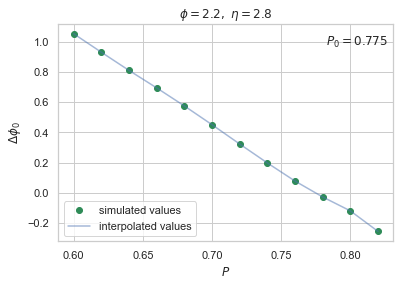

In [3]:
P0 = pur.P0(et=2.8,ph=2.2,lim=[0.6,0.8],res=0.02,plot=True,T=20,strokes=2/3,gridsize=1.5)

In [4]:
et = 2.8
ph = 2.2
s,r,tim = pur.init(et,ph,T=30)
tau = pur.stroke_input(P0,tim,r,strokes=1)
R = slts.mesher(np.arange(-1.5,1.5,0.1))
_,pswimmer = slts.evolve(tau,tim,R,r,s,k=100,e=0.3,c=0.6)

In [5]:
fig = plt.figure(figsize = (4.5,4.5))
plt.xlim(-1,1); plt.ylim(-1,1)
camera = Camera(fig)
for i in range(0,np.shape(pswimmer)[0],8):
    plt.plot(pswimmer[i].T[0],pswimmer[i].T[1],'k-', linewidth=2, alpha=0.5, label='_nolegend_')
    plt.plot(np.mean(pswimmer[i].T[0]),np.mean(pswimmer[i].T[1]),'ro', linewidth=2, alpha=0.5)
    camera.snap()
plt.legend(["CoM"])
plt.close()

In [6]:
animation = camera.animate()
animation.save(figfile+"purcell_large_angles.gif",writer = 'imagemagick',fps = 20,dpi=300)
animation

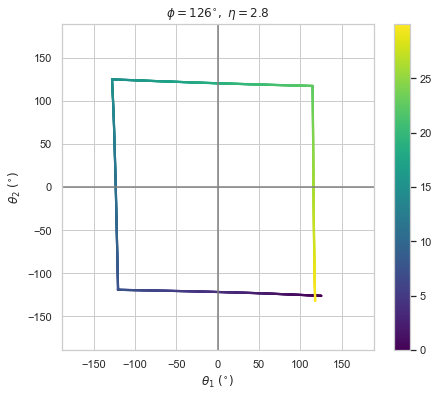

In [7]:
_,_ = pur.purcell_plot(pswimmer,tim,ph,et,plot=True,save=True,figfile=figfile)